<a href="https://colab.research.google.com/github/BannedMatt/FinalProject_2025_Matthew_Banawa_REMA/blob/main/FinalProject_2025_Matthew_Banawa_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing + EDA

In [ ]:
%%bash
wget --no-check-certificate 'https://drive.usercontent.google.com/download?id=1qe5hOSBxzIuxBb1G_Ih5X-O65QElollE&export=download&confirm=t&uuid=b2002093-cc6e-4bd5-be47-9603f0b33470
' -O KuaiRec.zip
unzip KuaiRec.zip -d data_final_project

In [3]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# set plot size
plt.rcParams["figure.figsize"] = (20, 13)
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [4]:
print("Loading big matrix...")
interactions = pd.read_csv("data_final_project/KuaiRec 2.0/data/big_matrix.csv")

print("Loading item features...")
item_categories = pd.read_csv("data_final_project/KuaiRec 2.0/data/item_categories.csv")
item_categories["feat"] = item_categories["feat"].map(eval)

print("Loading user features...")
user_features = pd.read_csv("data_final_project/KuaiRec 2.0/data/user_features.csv")

print("Loading items' daily features...")
item_daily_feat = pd.read_csv("data_final_project/KuaiRec 2.0/data/item_daily_features.csv")

Loading big matrix...
Loading item features...
Loading user features...
Loading items' daily features...


In [5]:
interactions.head()

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,0,3649,13838,10867,2020-07-05 00:08:23.438,20200705,1.593879e+09,1.273397
1,0,9598,13665,10984,2020-07-05 00:13:41.297,20200705,1.593879e+09,1.244082
2,0,5262,851,7908,2020-07-05 00:16:06.687,20200705,1.593879e+09,0.107613
3,0,1963,862,9590,2020-07-05 00:20:26.792,20200705,1.593880e+09,0.089885
4,0,8234,858,11000,2020-07-05 00:43:05.128,20200705,1.593881e+09,0.078000


In [6]:
item_categories.head()

,video_id,feat
0,0,[8]
1,1,"[27, 9]"
2,2,[9]
3,3,[26]
4,4,[5]


In [7]:
all_feats = item_categories['feat'].explode().astype(int)

min_feat = all_feats.min()
max_feat = all_feats.max()

print("Minimum feat value:", min_feat)
print("Maximum feat value:", max_feat)

Minimum feat value: 0
Maximum feat value: 30


In [8]:
user_features.head()

,user_id,user_active_degree,is_lowactive_period,is_live_streamer,is_video_author,follow_user_num,follow_user_num_range,fans_user_num,fans_user_num_range,friend_user_num,...,onehot_feat8,onehot_feat9,onehot_feat10,onehot_feat11,onehot_feat12,onehot_feat13,onehot_feat14,onehot_feat15,onehot_feat16,onehot_feat17
0,0,high_active,0,0,0,5,"(0,10]",0,0,0,...,184,6,3,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,full_active,0,0,0,386,"(250,500]",4,"[1,10)",2,...,186,6,2,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,full_active,0,0,0,27,"(10,50]",0,0,0,...,51,2,3,0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,full_active,0,0,0,16,"(10,50]",0,0,0,...,251,3,2,0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,full_active,0,0,0,122,"(100,150]",4,"[1,10)",0,...,99,4,2,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
feat_cols = [f'onehot_feat{i}' for i in range(18)]
subset = user_features[feat_cols]

min_val = subset.min().min()
max_val = subset.max().max()

print("Minimum value across all onehot_feat columns:", min_val)
print("Maximum value across all onehot_feat columns:", max_val)

Minimum value across all onehot_feat columns: 0.0
Maximum value across all onehot_feat columns: 1075.0


the feat in item_categories and the one hot feats in user_features are definitely not the same thing. the one in item categories probably stands for genres or tags but i'm not sure about the ones in user_features

In [10]:
item_daily_feat.head()

,video_id,date,author_id,video_type,upload_dt,upload_type,visible_status,video_duration,video_width,video_height,...,download_cnt,download_user_num,report_cnt,report_user_num,reduce_similar_cnt,reduce_similar_user_num,collect_cnt,collect_user_num,cancel_collect_cnt,cancel_collect_user_num
0,0,20200705,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,8,8,0,0,3,3,NaN,NaN,NaN,NaN
1,0,20200706,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,0,0,5,5,NaN,NaN,NaN,NaN
2,0,20200707,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,0,0,0,0,NaN,NaN,NaN,NaN
3,0,20200708,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,3,3,0,0,3,3,NaN,NaN,NaN,NaN
4,0,20200709,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,2,1,1,1,NaN,NaN,NaN,NaN


In [11]:
item_daily_feat[['video_width', 'video_height']].drop_duplicates()

,video_width,video_height
0,720,1280
63,886,1015
189,1080,1080
304,720,720
554,360,640
...,...,...
342619,642,1280
343117,721,1166
343121,1080,1022
343178,1242,1242


In [12]:
#we dont want to recommend items to a user who cant view them
item_daily_feat = item_daily_feat[item_daily_feat['visible_status'] == 'public']

In [13]:
# I do the most simple thing, I remove the rows with missing values
interactions = interactions.dropna()
# I also remove the duplicates
interactions = interactions.drop_duplicates()
# I also remove the rows with negative timestamps
interactions = interactions[interactions["timestamp"] >= 0]
interactions = interactions[interactions['watch_ratio'] >= 0]

- How many users and items are there in the data?
- What are the data types?
- How many unique users and unique videos?
- Are there timestamps, and if so, what is their range?
- How many interactions are there in the data?
- How many interactions are there per user?
- How many interactions are there per item?
- What is the distribution of the interactions?
- What is the distribution of the interactions per user?
- What is the distribution of the interactions per item?

#### Interactions per User

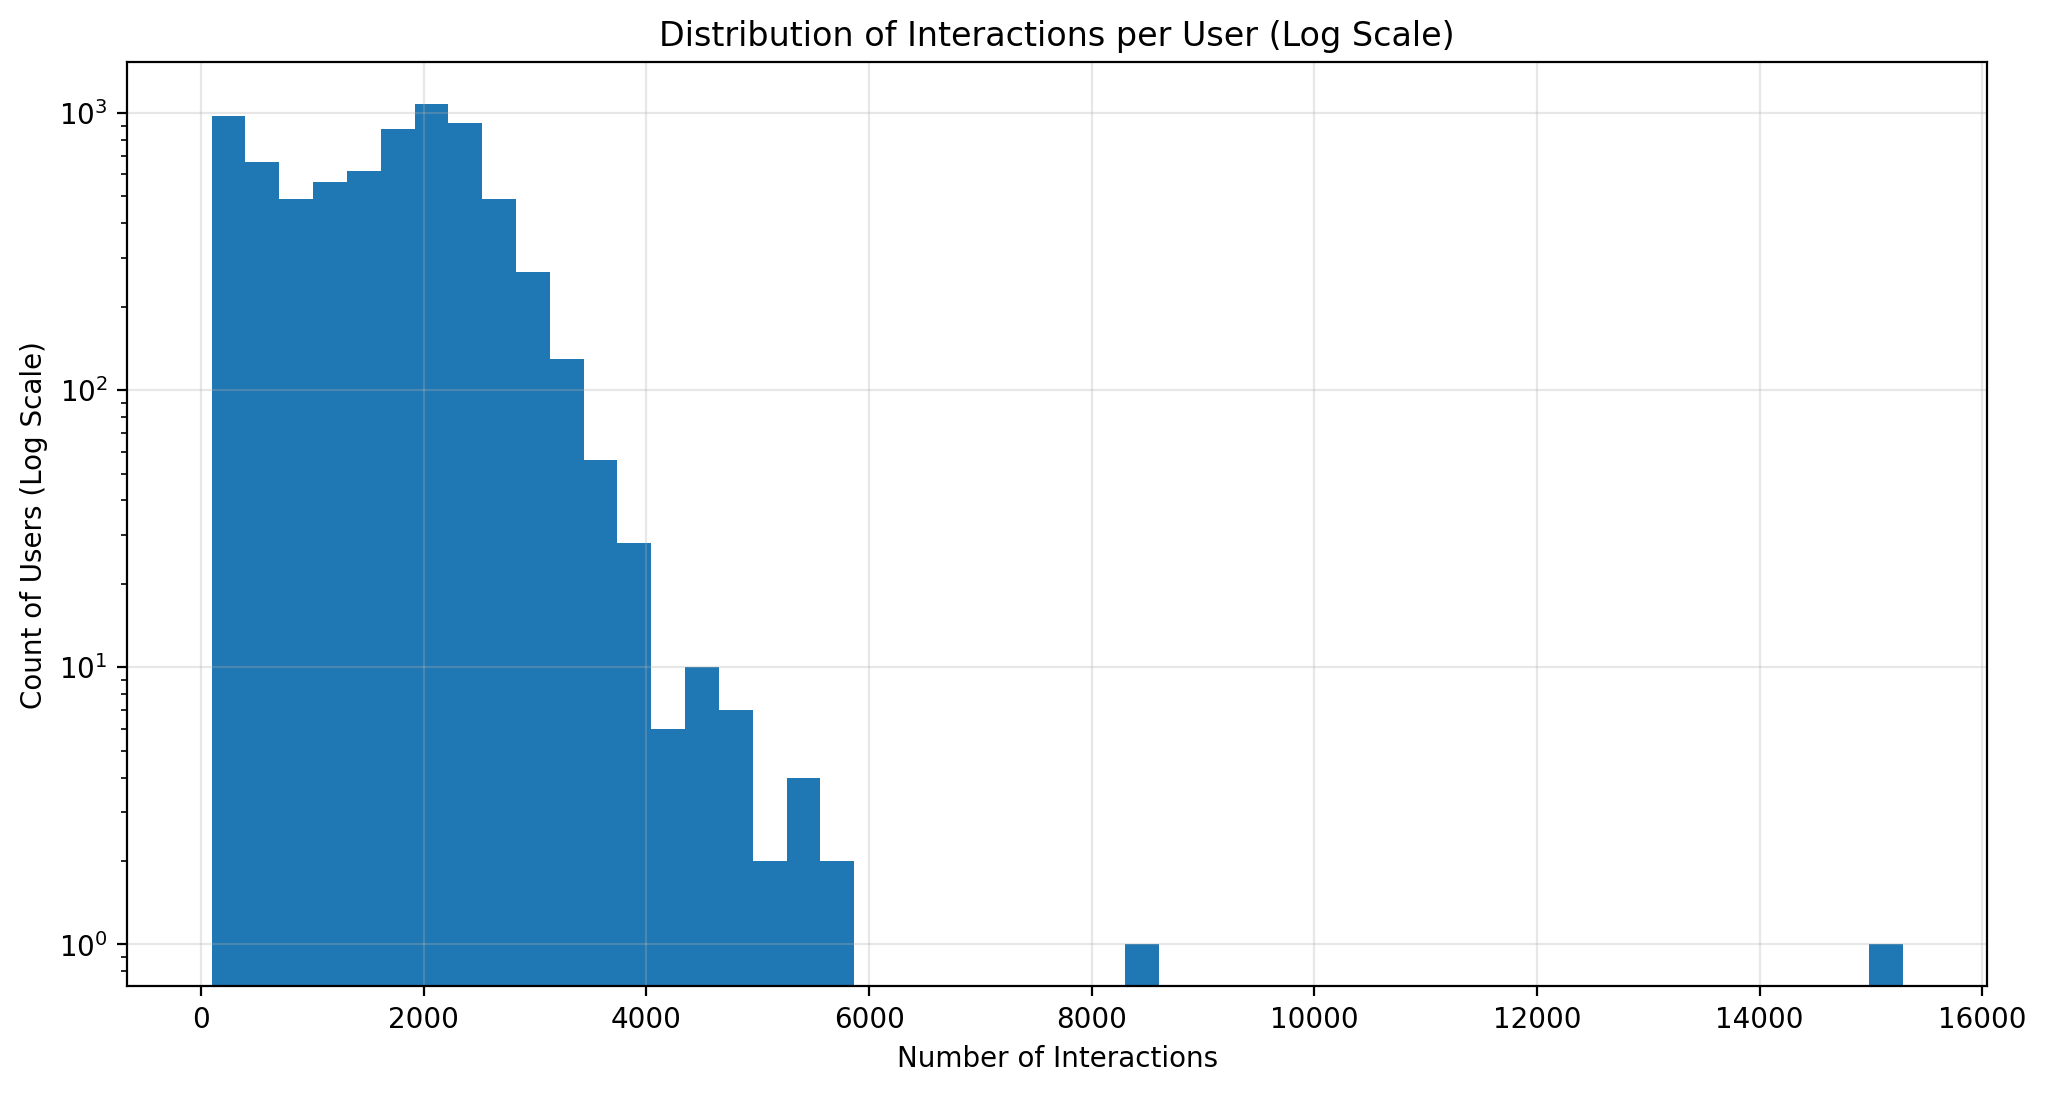

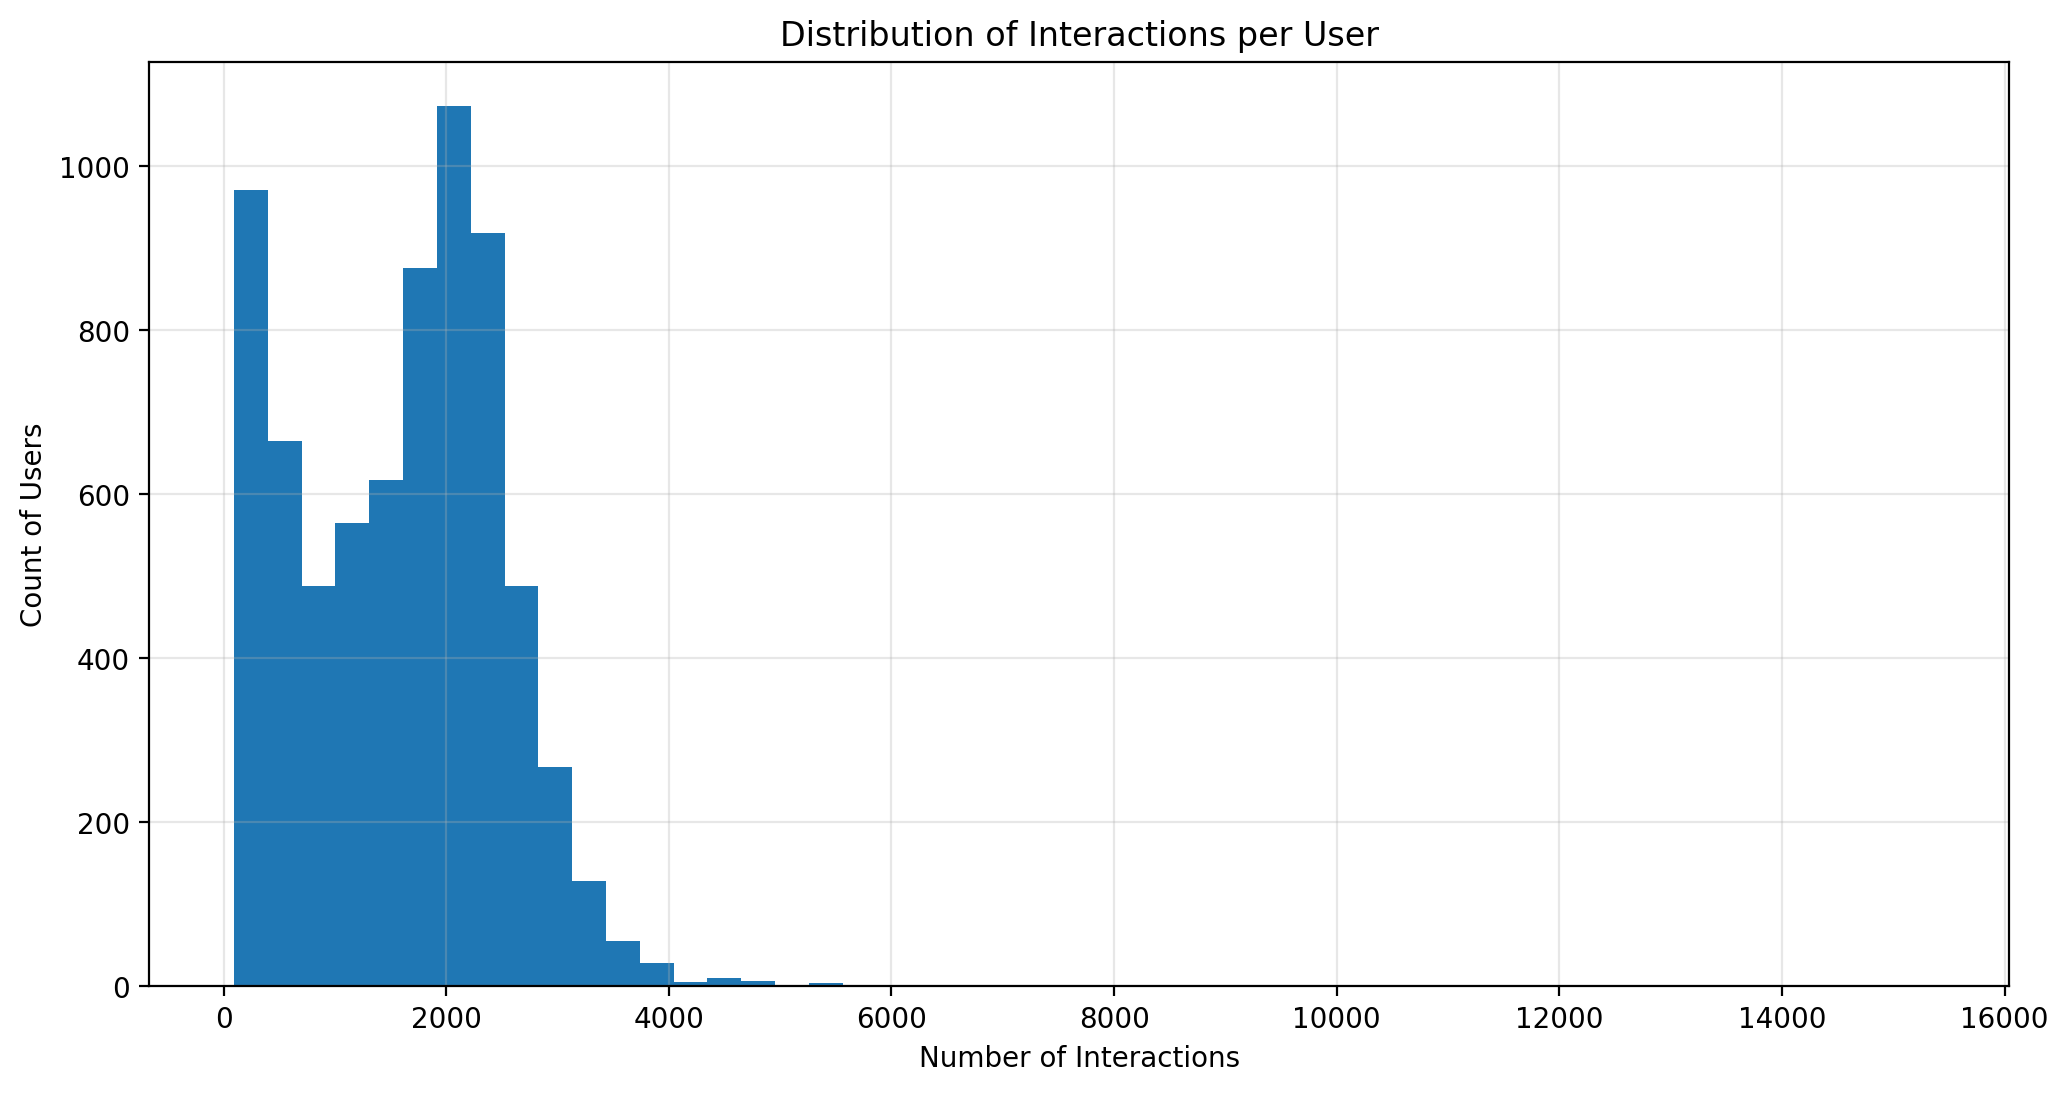

In [14]:
# Plot log histogram of interactions per user
# Get counts per user
user_counts = interactions["user_id"].value_counts()

# Create histogram with log scale
plt.figure(figsize=(12, 6))
plt.hist(user_counts, bins=50, log=True)
plt.title("Distribution of Interactions per User (Log Scale)")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Users (Log Scale)")
plt.grid(True, alpha=0.3)
plt.show()

# Also plot regular scale for comparison
plt.figure(figsize=(12, 6))
plt.hist(user_counts, bins=50)
plt.title("Distribution of Interactions per User")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Users")
plt.grid(True, alpha=0.3)
plt.show()

most accounts barely have any interactions and one account has an abnormaly high amount of interactions

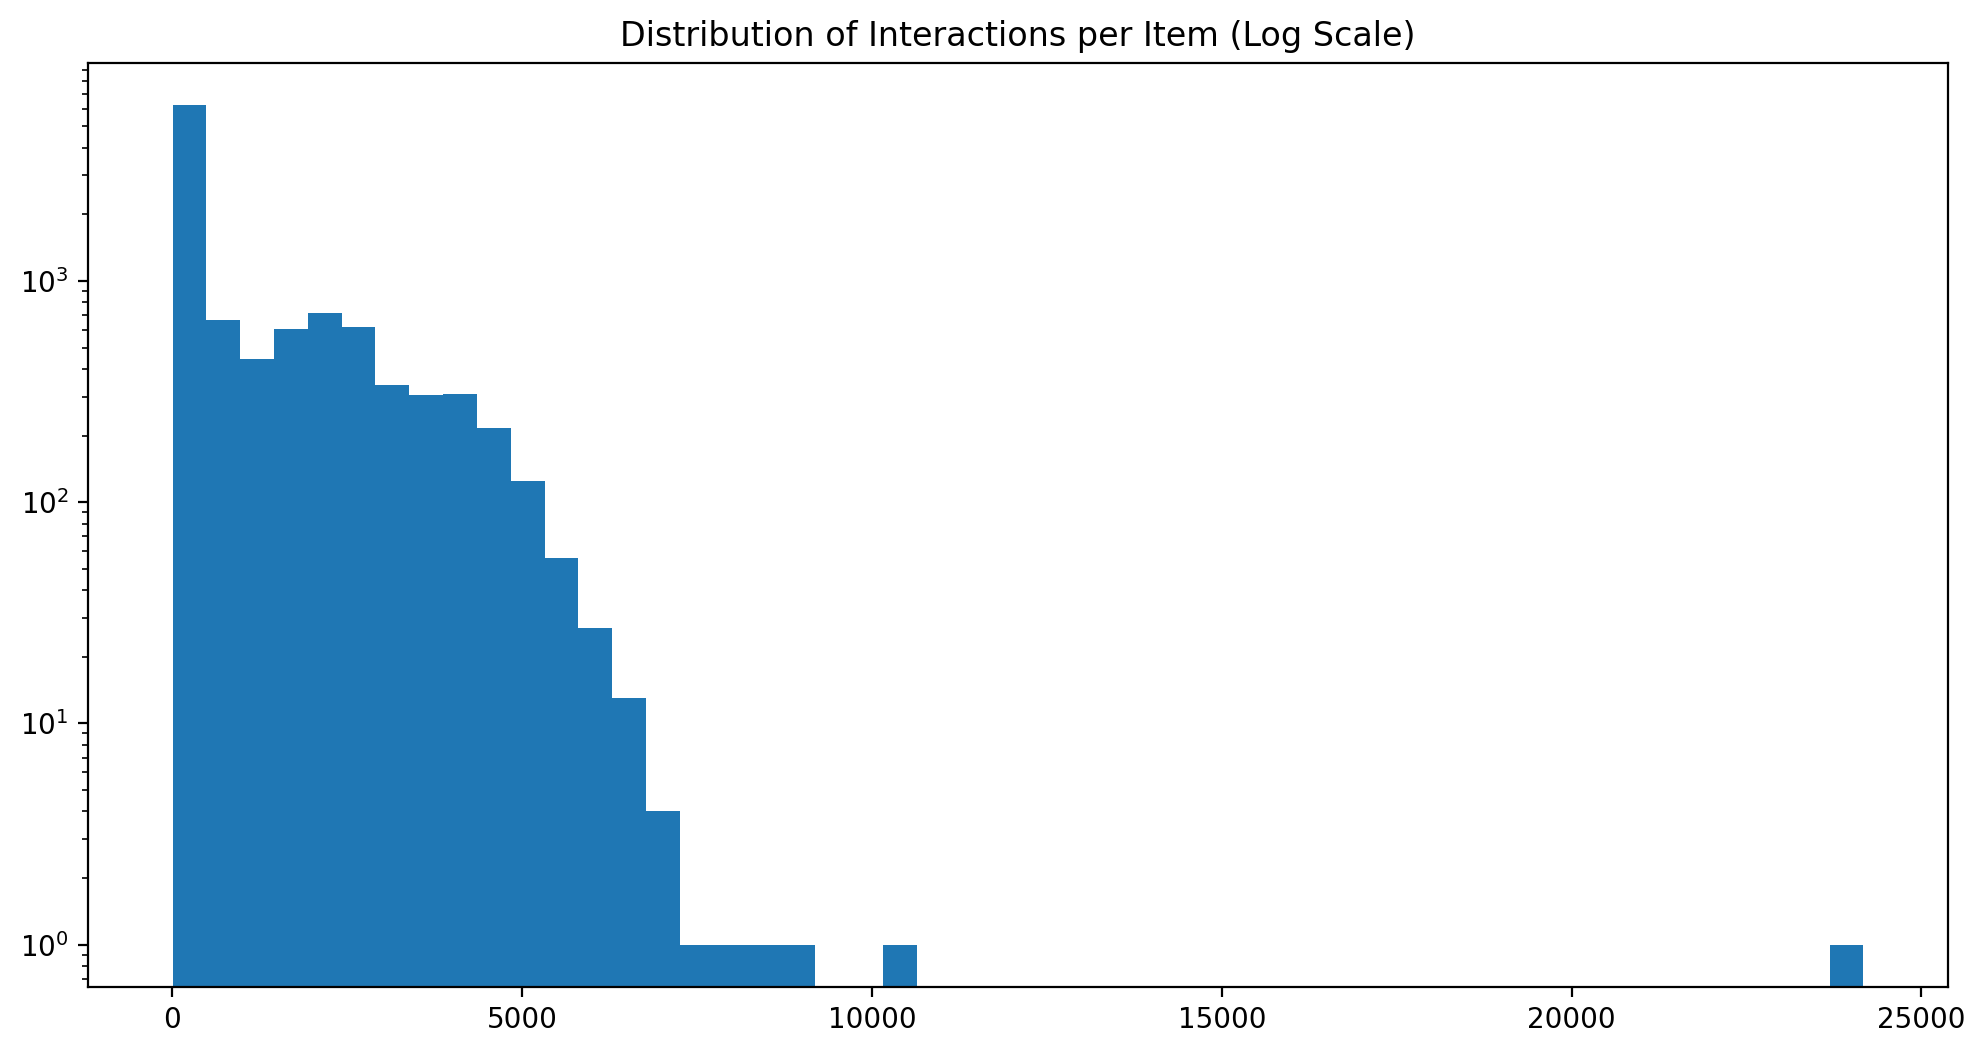

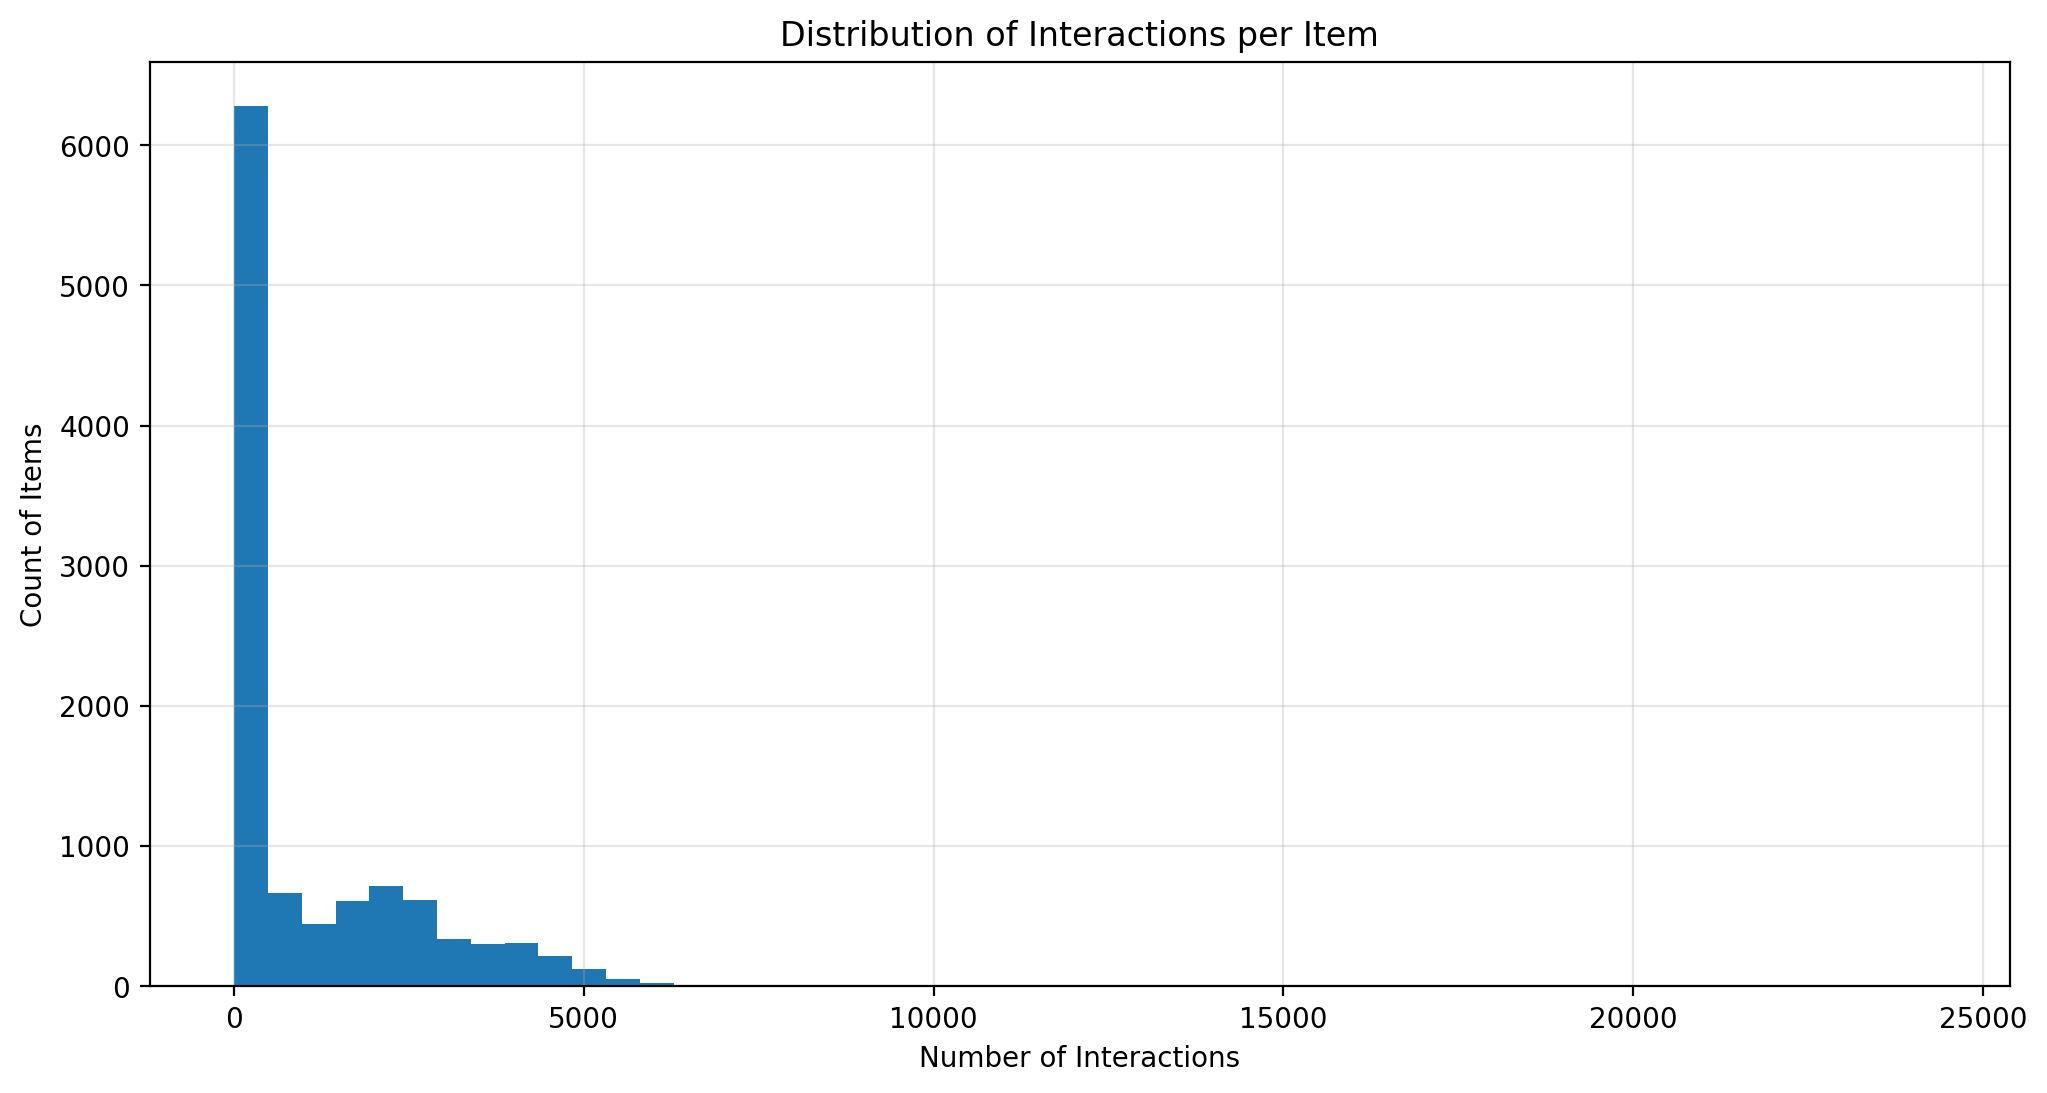

In [15]:
# Let's see the distribution of the interactions per item
item_counts = interactions["video_id"].value_counts()

# Plot log histogram of interactions per item
plt.figure(figsize=(12, 6))
plt.hist(item_counts, bins=50, log=True)
plt.title("Distribution of Interactions per Item (Log Scale)")

# Also plot regular scale for comparison
plt.figure(figsize=(12, 6))
plt.hist(item_counts, bins=50)
plt.title("Distribution of Interactions per Item")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Items")
plt.grid(True, alpha=0.3)
plt.show()

i guess this means kuaishou app is has a popularity bias

### Temporal Analysis

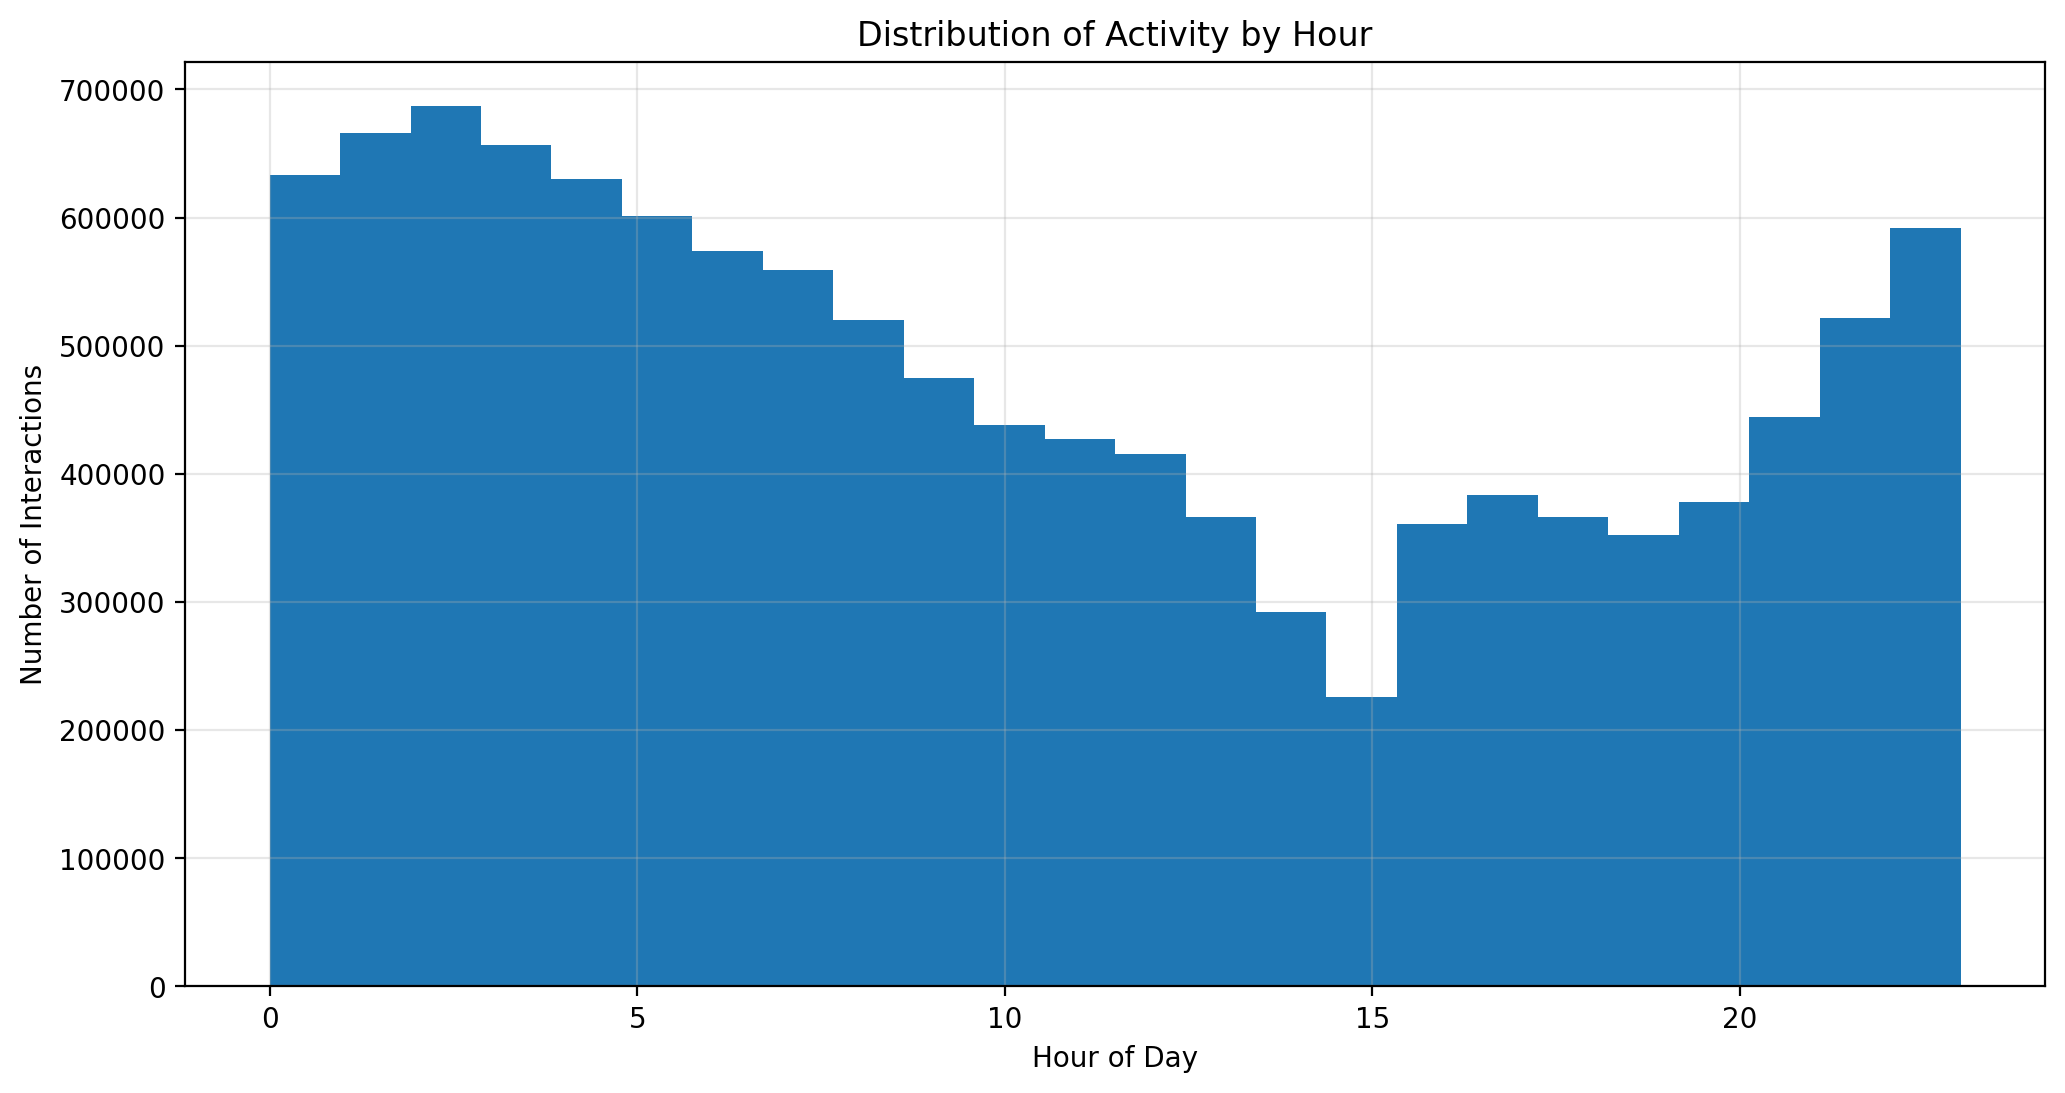

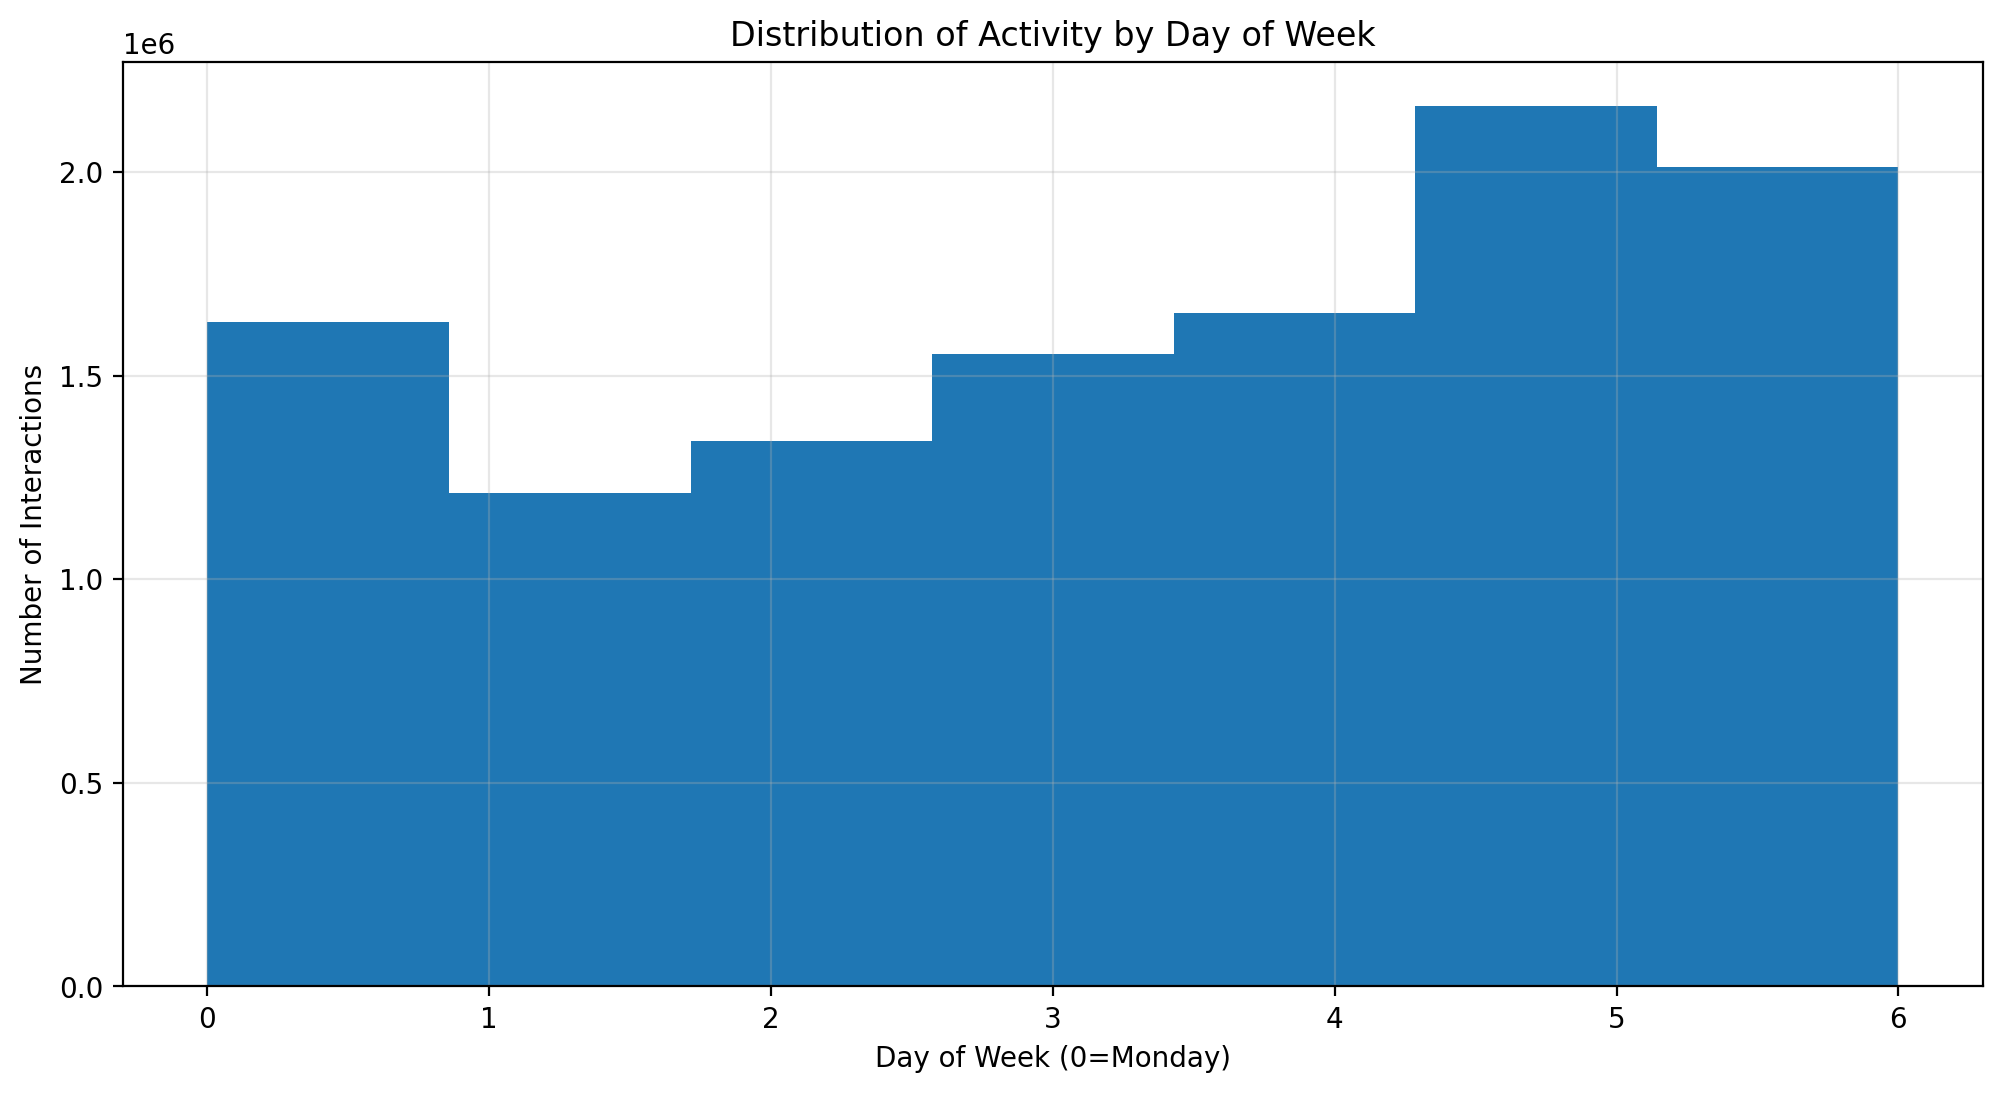

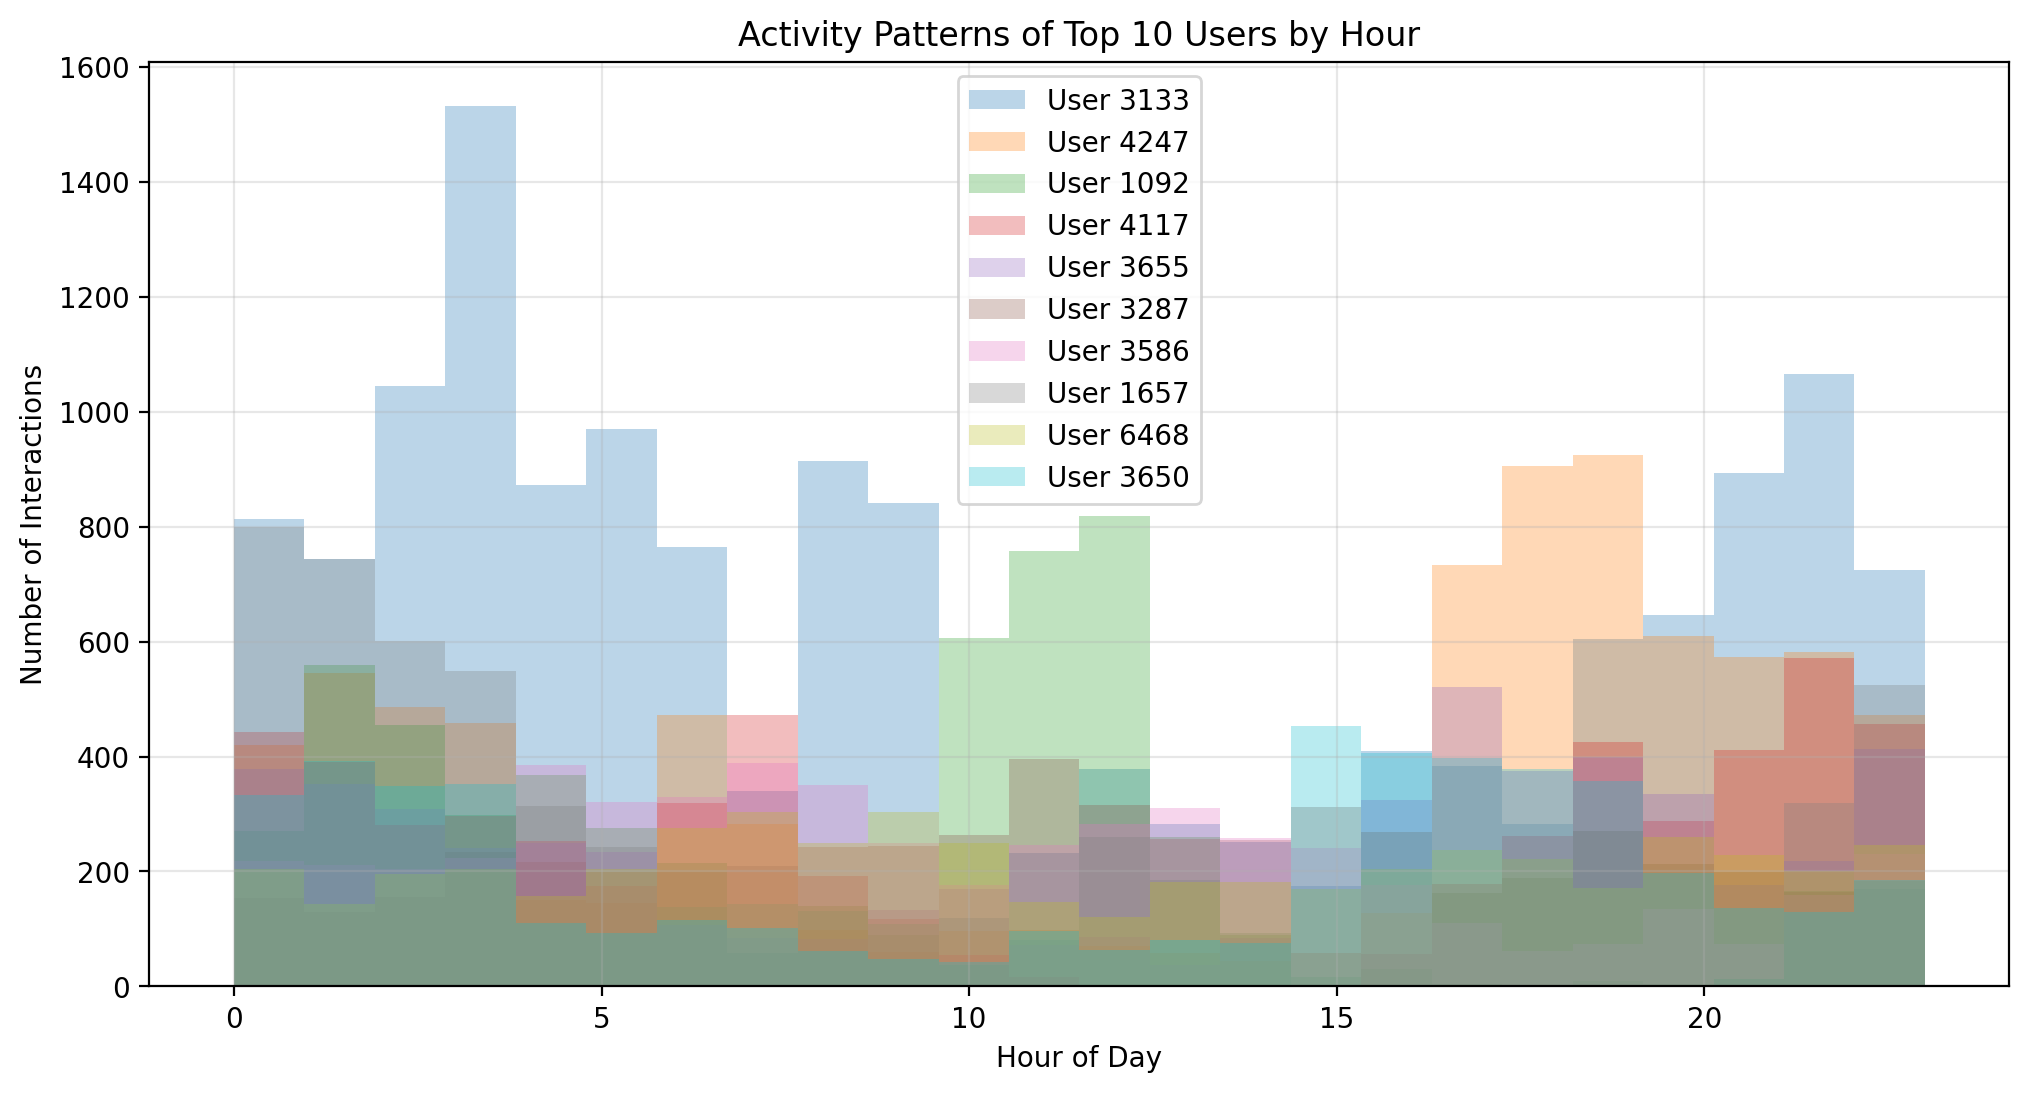


Peak Usage Hours:
Hour 2:00 - 686678 interactions
Hour 1:00 - 666058 interactions
Hour 3:00 - 656852 interactions

Peak Usage Days:
Saturday - 2161139 interactions
Sunday - 2013417 interactions
Friday - 1654813 interactions


In [16]:
interactions["timestamp"] = pd.to_datetime(
    interactions["timestamp"].fillna(0), unit="s"
)

interactions["hour"] = interactions["timestamp"].dt.hour
interactions["day"] = interactions["timestamp"].dt.dayofweek

# Plot activity over time
plt.figure(figsize=(12, 6))
plt.hist(interactions["hour"], bins=24)
plt.title("Distribution of Activity by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Interactions")
plt.grid(True, alpha=0.3)
plt.show()

# Plot activity by day of week
plt.figure(figsize=(12, 6))
plt.hist(interactions["day"], bins=7)
plt.title("Distribution of Activity by Day of Week")
plt.xlabel("Day of Week (0=Monday)")
plt.ylabel("Number of Interactions")
plt.grid(True, alpha=0.3)
plt.show()

# Get top 10 most active users
top_users = interactions["user_id"].value_counts().head(10).index

# Plot activity patterns for top users
plt.figure(figsize=(12, 6))
for user in top_users:
    user_data = interactions[interactions["user_id"] == user]
    plt.hist(user_data["hour"], bins=24, alpha=0.3, label=f"User {user}")
plt.title("Activity Patterns of Top 10 Users by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Interactions")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Find peak usage times
hourly_activity = interactions.groupby("hour").size()
peak_hours = hourly_activity.nlargest(3)

print("\nPeak Usage Hours:")
for hour, count in peak_hours.items():
    print(f"Hour {hour}:00 - {count} interactions")

daily_activity = interactions.groupby("day").size()
peak_days = daily_activity.nlargest(3)

print("\nPeak Usage Days:")
for day, count in peak_days.items():
    days = [
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ]
    print(f"{days[int(day)]} - {count} interactions")

 # Feature Engineering

Apps like tiktok usually recommend videos similar to the ones that a user has already watched so i think content based filtering would be a good idea. Furthermore, we should also probably use a neural network since we want to take into account each user's preferences

We create a dataframe of user vectors and another for item vectors which will be the data given to their respective neural networks

In [17]:
print('interactions')
print(interactions.columns)
print('item_daily_feat')
print(item_daily_feat.columns)
print('item_category')
print(item_categories.columns)

interactions
Index(['user_id', 'video_id', 'play_duration', 'video_duration', 'time',
       'date', 'timestamp', 'watch_ratio', 'hour', 'day'],
      dtype='object')
item_daily_feat
Index(['video_id', 'date', 'author_id', 'video_type', 'upload_dt',
       'upload_type', 'visible_status', 'video_duration', 'video_width',
       'video_height', 'music_id', 'video_tag_id', 'video_tag_name',
       'show_cnt', 'show_user_num', 'play_cnt', 'play_user_num',
       'play_duration', 'complete_play_cnt', 'complete_play_user_num',
       'valid_play_cnt', 'valid_play_user_num', 'long_time_play_cnt',
       'long_time_play_user_num', 'short_time_play_cnt',
       'short_time_play_user_num', 'play_progress', 'comment_stay_duration',
       'like_cnt', 'like_user_num', 'click_like_cnt', 'double_click_cnt',
       'cancel_like_cnt', 'cancel_like_user_num', 'comment_cnt',
       'comment_user_num', 'direct_comment_cnt', 'reply_comment_cnt',
       'delete_comment_cnt', 'delete_comment_user_num', 'co

In [14]:
# Step 1: Explode feats from item_categories
item_cat_exploded = item_categories.copy()
item_cat_exploded['feat'] = item_cat_exploded['feat'].apply(lambda x: x if isinstance(x, list) else [x])
item_cat_exploded = item_cat_exploded.explode('feat').astype({'feat': int})

# Step 2: Merge with interactions to get user + feat + watch_ratio
inter_feat = interactions.merge(item_cat_exploded, on='video_id', how='inner')

# Step 3: Compute average watch_ratio per user per feat
user_feat_avg = inter_feat.groupby(['user_id', 'feat'])['watch_ratio'].mean().reset_index()

# Step 4: Pivot into wide format: one column per feat (feat_0, feat_1, ...)
user_feat_matrix = user_feat_avg.pivot(index='user_id', columns='feat', values='watch_ratio').fillna(0)
user_feat_matrix.columns = [f'feat_{i}' for i in user_feat_matrix.columns]
user_feat_matrix = user_feat_matrix.reset_index()

# Step 5: Merge back (user_id, video_id) to build final user_data
user_data = interactions[['user_id', 'video_id']].drop_duplicates()
user_data = user_data.merge(user_feat_matrix, on='user_id', how='left')
user_data.head()

In [16]:
# Select relevant columns
cols_to_use = ['video_id', 'video_duration', 'play_cnt', 'comment_cnt', 'follow_cnt', 'share_cnt']

# Work on a copy of just the target columns
item_subset = item_daily_feat[cols_to_use]

# Group by video_id, aggregate
item_agg_feat = item_subset.groupby('video_id').agg({
    'video_duration': 'first',   # or 'max' / 'min' if you prefer
    'play_cnt': 'sum',
    'comment_cnt': 'sum',
    'follow_cnt': 'sum',
    'share_cnt': 'sum',
}).reset_index()
item_agg_feat.head()

,video_id,video_duration,play_cnt,comment_cnt,follow_cnt,share_cnt
0,0,5966.0,411691,448,12626,105
1,1,NaN,141667,59,246,64
2,2,8000.0,670248,30,404,19
3,3,NaN,9137,7,37,26
4,4,18000.0,610,0,1,0


In [17]:
# Step 1: Explode item_categories['feat'] to ensure each row has a single feat
item_cat_exp = item_categories.copy()
item_cat_exp['feat'] = item_cat_exp['feat'].apply(lambda x: x if isinstance(x, list) else [x])
item_cat_exp = item_cat_exp.explode('feat').astype({'feat': int})

#One-hot encode the 'feat' column using integers (1/0)
item_feat_ohe = pd.get_dummies(item_cat_exp['feat'], prefix='feat').astype(int)
item_feat_ohe['video_id'] = item_cat_exp['video_id']

#Aggregate one-hot encodings to get one row per video
item_feat_ohe = item_feat_ohe.groupby('video_id').max().reset_index()

# Merge with the clean aggregated item features
# item_agg_feat is assumed to have: video_id, video_duration, play_cnt, comment_cnt, follow_cnt, share_cnt
item_data = item_feat_ohe.merge(item_agg_feat, on='video_id', how='left')
item_data.head()

,video_id,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,...,feat_26,feat_27,feat_28,feat_29,feat_30,video_duration,play_cnt,comment_cnt,follow_cnt,share_cnt
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,5966.0,411691.0,448.0,12626.0,105.0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,NaN,141667.0,59.0,246.0,64.0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,8000.0,670248.0,30.0,404.0,19.0
3,3,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,NaN,9137.0,7.0,37.0,26.0
4,4,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,18000.0,610.0,0.0,1.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_item = StandardScaler()
numerical_cols = ['video_duration', 'play_cnt', 'comment_cnt', 'follow_cnt', 'share_cnt']
item_data[numerical_cols] = scaler_item.fit_transform(item_data[numerical_cols])

scaler_user = StandardScaler()
feat_cols = [col for col in user_data.columns if col.startswith("feat_")]
user_data[feat_cols] = scaler_user.fit_transform(user_data[feat_cols])

user_train = user_data.drop(columns=['user_id', 'video_id'])
item_train = item_data.drop(columns=['video_id'])

In [ ]:
from sklearn.model_selection import train_test_split
item_train, item_test = train_test_split(
    item_train, train_size=0.80, shuffle=True, random_state=1
)
user_train, user_test = train_test_split(
    user_train, train_size=0.80, shuffle=True, random_state=1
)
y_train, y_test = train_test_split(
    y_train, train_size=0.80, shuffle=True, random_state=1
)
print(f"video training data shape: {item_train.shape}")
print(f"video test data shape: {item_test.shape}")

# Model Development

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

num_user_features = user_train.shape[1]
num_item_features = item_train.shape[1]

num_outputs = 32
tf.random.set_seed(1)
user_NN = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_outputs),
    ]
)

item_NN = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_outputs),
    ]
)

# create the user input and point to the base network
input_user = tf.keras.layers.Input(shape=(num_user_features))
vu = user_NN(input_user)
vu = tf.linalg.l2_normalize(vu, axis=1)

# create the item input and point to the base network
input_item = tf.keras.layers.Input(shape=(num_item_features))
vm = item_NN(input_item)
vm = tf.linalg.l2_normalize(vm, axis=1)

# compute the dot product of the two vectors vu and vm
output = tf.keras.layers.Dot(axes=1)([vu, vm])

# specify the inputs and output of the model
model = tf.keras.Model([input_user, input_item], output)

model.summary()

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(
    [user_train, item_train],
    y_train,
    validation_data=([user_test, item_test], y_test),
    epochs=5,
    )

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

loss, mae = model.evaluate([user_test, item_test], y_test)

print(f"Test MSE: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

# Recommendation Algorithm

# Evaluation